# F-subgiant comparison sample

We want to make a comparison sample of F subgiants to see if our target stands out in some way.  Mainly that means:

1. TESS lightcurve period/amplitude

But also conceivably:  

2. Flares?   
3. Spectral variability?  
4. Something else?  

In [1]:
import numpy as np
import pandas as pd
import os
import glob
from astropy.io import fits
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import trange
from astropy.time import Time
import lightkurve as lk
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set_context('paper')

from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

### Get Table 1 from [Leiner et al. 2022](https://ui.adsabs.harvard.edu/abs/2022ApJ...927..222L/abstract)

In [2]:
fn = '../../data/literature/liener2022/apjac53b1t1_mrt.txt'

In [3]:
tab = Table.read(fn, format='ascii.mrt')

In [4]:
df = tab.to_pandas()

In [5]:
len(df)

1895

In [6]:
df.columns.values

array(['ID', 'VSX', 'TIC', 'RAdeg', 'DEdeg', 'D', 'Gmag', '(BP-RP)',
       'RUWE', 'chi2', 'NAL', 'PVSX', 'PTess', 'Amp', 'NSec', 'AV',
       'Class'], dtype=object)

In [7]:
df['G_absolute_mag'] = df['Gmag'] - 5*np.log10(df['D']) + 5

In [8]:
df_targ = Table.read('../../data/gaia/1668443694513O-result.vot').to_pandas()

In [9]:
#df_targ.columns.values

In [10]:
keep_cols = ['parallax', 'phot_g_mean_mag', 'bp_rp', 'teff_gspphot', 'logg_gspphot']

In [11]:
df_targ = df_targ[keep_cols]

In [12]:
df_targ

,parallax,phot_g_mean_mag,bp_rp,teff_gspphot,logg_gspphot
0,2.686932,9.979286,0.639657,6295.805176,3.7483
1,2.583131,16.715607,2.358242,3601.700439,4.4807


In [13]:
df_targ['D'] = 1/(df_targ['parallax']/1000.0)

In [14]:
df_targ['G_absolute_mag'] = df_targ['phot_g_mean_mag'] - 5*np.log10(df_targ['D']) + 5

In [15]:
df

,ID,VSX,TIC,RAdeg,DEdeg,D,Gmag,(BP-RP),RUWE,chi2,NAL,PVSX,PTess,Amp,NSec,AV,Class,G_absolute_mag
0,2448158953886445696,ZTF J000020.00-030630.5,138662652,0.08336,-3.10850,1489,14.84,1.28,1.12,407.47,324,6.13,-999.0,-999.0,0,0.11,RS,3.975527
1,2874226134920416512,CSS_J000131.5+324913,83957002,0.38142,32.82031,1238,14.71,1.36,1.00,400.64,399,13.05,-999.0,-999.0,0,0.14,SSG,4.246397
2,385028910256998528,ZTF J000139.60+442609.4,259193712,0.41504,44.43595,694,12.83,1.11,0.95,620.98,442,3.31,-999.0,-999.0,0,0.27,RS,3.623203
3,2753192410330966912,ZTF J000146.98+093917.0,408505366,0.44579,9.65473,1942,15.09,1.51,1.03,370.28,351,22.03,-999.0,-999.0,0,0.40,SSG,3.648754
4,2745167586059626240,ZTF J000216.58+055915.0,403022015,0.56911,5.98752,732,11.98,1.22,1.42,1924.19,548,6.46,-999.0,-999.0,0,0.12,cut,2.657445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,2878050614319122048,CSS_J235152.6+342725,67877343,357.96921,34.45697,1156,14.27,1.28,0.93,319.32,370,7.24,-999.0,-999.0,0,0.17,RS,3.955211
1891,1926270708882502656,ZTF J235229.51+453334.9,177396080,358.12298,45.55972,1840,15.38,1.52,1.00,421.70,422,13.40,-999.0,-999.0,0,0.38,SSG,4.055911
1892,2868410543043370880,ZTF J235240.40+310945.8,125280992,358.16835,31.16275,1836,15.07,1.28,1.01,401.40,389,0.91,-999.0,-999.0,0,0.30,RS,3.750637
1893,1939867681994193280,ZTF J235609.70+485623.0,431733760,359.04044,48.93974,1541,14.78,1.42,1.05,759.88,689,3.89,-999.0,-999.0,0,0.46,RS,3.840987


In [16]:
series_out = 'TIC ' + df['TIC'].dropna().astype(str)

In [17]:
series_out = 'Gaia DR2 ' + df['ID'].astype(str)

In [18]:
series_out.to_csv('../../data/gaia/Leiner_names_GDR2.csv', index=False, header=False)

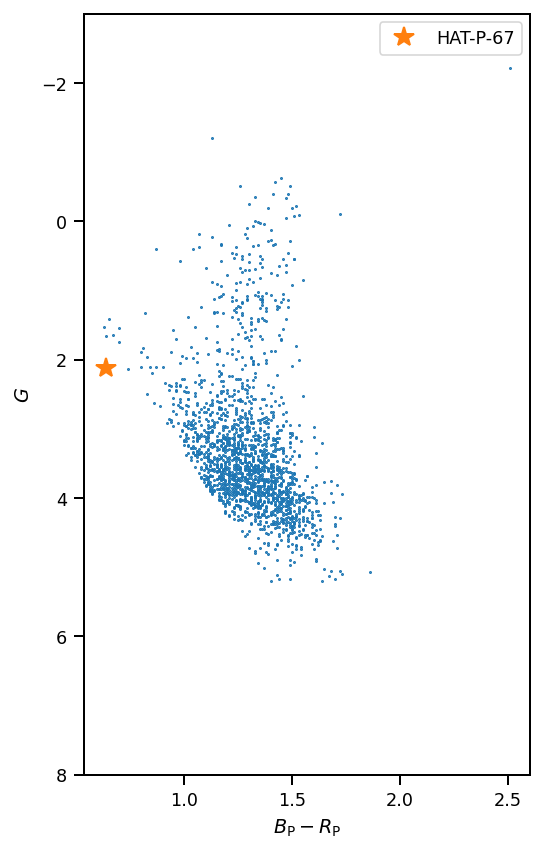

In [19]:
plt.figure(figsize=(4, 7))
plt.plot(df['(BP-RP)'], df['G_absolute_mag'], '.', ms=1)
plt.plot(df_targ['bp_rp'], df_targ['G_absolute_mag'], '*', ms=10, label='HAT-P-67')
plt.xlabel('$B_\mathrm{P}-R_\mathrm{P}$')
plt.ylabel('$G$')
plt.ylim(8, -3)
plt.legend();

Bummer, HAT-P-67 sits just to the blue side of the selection criteria used by Leiner et al.

## Custom comparison sample

We'll make a custom comparison sample using the TESS Input Catalog with these criteria:

- $6300 <T_\mathrm{eff} [K] < 6600 $
- $3.5 < \log{g} < 4.5$
- $4 < T_\mathrm{mag} < 10$

In [20]:
df_comparison = Table.read('../../data/TESS/TICv8.xml').to_pandas()

In [21]:
df_targ_TESS = Table.read('../../data/TESS/TICv8_2_HAT_P_67.xml').to_pandas()

In [22]:
df_comparison['bp_rp'] = df_comparison['gaiabp'] - df_comparison['gaiarp']
df_comparison['D'] = 1/(df_comparison['plx']/1000)
df_comparison['G_absolute_mag'] = df_comparison['GAIAmag'] - 5*np.log10(df_comparison['D'])+5

In [23]:
df_comparison.columns.values

array(['ID', 'version', 'HIP', 'TYC', 'UCAC', 'TWOMASS', 'SDSS',
       'ALLWISE', 'GAIA', 'APASS', 'KIC', 'objType', 'typeSrc', 'ra',
       'dec', 'POSflag', 'pmRA', 'e_pmRA', 'pmDEC', 'e_pmDEC', 'PMflag',
       'plx', 'e_plx', 'PARflag', 'gallong', 'gallat', 'eclong', 'eclat',
       'Bmag', 'e_Bmag', 'Vmag', 'e_Vmag', 'umag', 'e_umag', 'gmag',
       'e_gmag', 'rmag', 'e_rmag', 'imag', 'e_imag', 'zmag', 'e_zmag',
       'Jmag', 'e_Jmag', 'Hmag', 'e_Hmag', 'Kmag', 'e_Kmag', 'TWOMflag',
       'prox', 'w1mag', 'e_w1mag', 'w2mag', 'e_w2mag', 'w3mag', 'e_w3mag',
       'w4mag', 'e_w4mag', 'GAIAmag', 'e_GAIAmag', 'Tmag', 'e_Tmag',
       'TESSflag', 'SPFlag', 'Teff', 'e_Teff', 'logg', 'e_logg', 'MH',
       'e_MH', 'rad', 'e_rad', 'mass', 'e_mass', 'rho', 'e_rho',
       'lumclass', 'lum', 'e_lum', 'd', 'e_d', 'ebv', 'e_ebv', 'numcont',
       'contratio', 'disposition', 'duplicate_id', 'priority', 'eneg_EBV',
       'epos_EBV', 'EBVflag', 'eneg_Mass', 'epos_Mass', 'eneg_Rad',
       '

(5.0, 3.0)

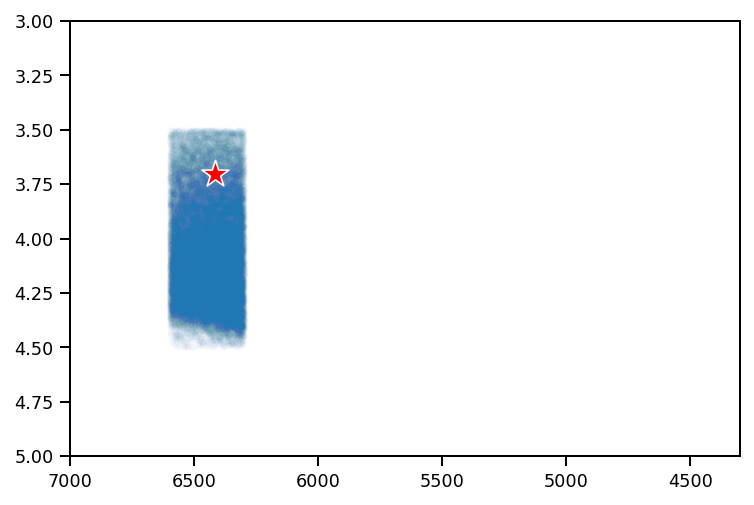

In [24]:
plt.plot(df_comparison['Teff'], df_comparison['logg'], '.', alpha=0.01)
plt.scatter(df_targ_TESS['Teff'], df_targ_TESS['logg'], marker='*', 
            c='r', s=200, ec='w', zorder=10, label='HAT-P-67')
plt.xlim(7000, 4300)
plt.ylim(5, 3)

Text(0.5, 0, '$T_\\mathrm{mag}$')

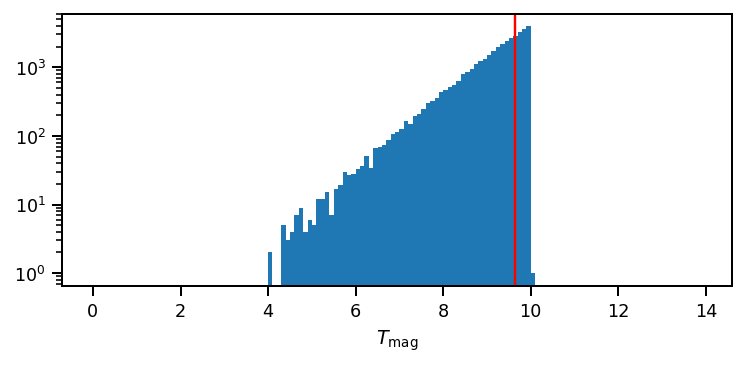

In [25]:
plt.figure(figsize=(6, 2.5))
plt.hist(df_comparison['Tmag'], bins=np.arange(0, 14, 0.1));
plt.axvline(df_targ_TESS['Tmag'][0], color='r');
plt.yscale('log'); plt.xlabel('$T_\mathrm{mag}$')

In [26]:
mask = df_comparison['Tmag'] > df_targ_TESS['Tmag'][0]

Text(0.5, 0, '$D$ (pc)')

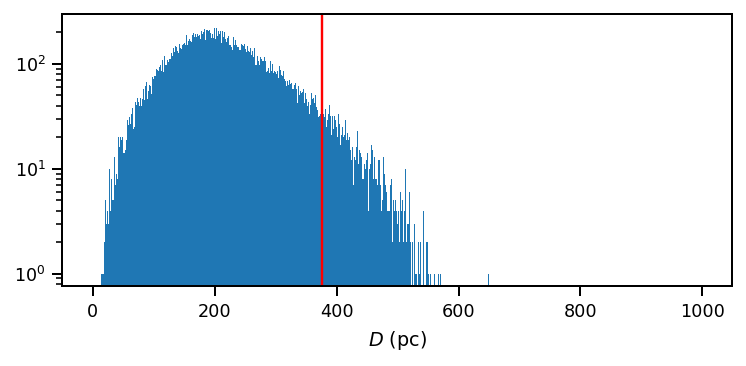

In [27]:
plt.figure(figsize=(6, 2.5))
plt.hist(df_comparison['D'], bins=np.arange(0, 1000, 1));
plt.axvline(1/(df_targ_TESS['plx']/1000)[0], color='r');
plt.yscale('log'); plt.xlabel('$D$ (pc)')

Neat, most of our comparison sample is closer than HAT-P-67.

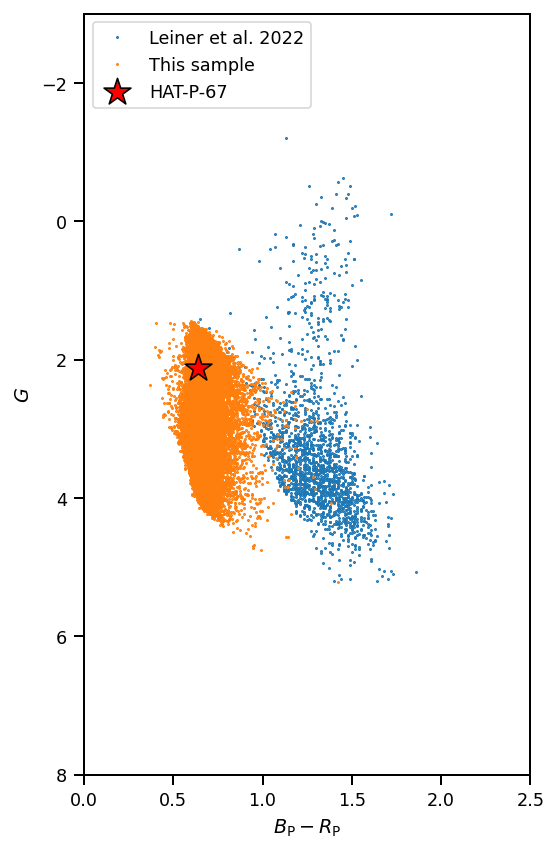

In [28]:
plt.figure(figsize=(4, 7))
plt.plot(df['(BP-RP)'], df['G_absolute_mag'], '.', ms=1, label='Leiner et al. 2022')
plt.plot(df_comparison['bp_rp'], df_comparison['G_absolute_mag'], 
         '.', ms=1, label='This sample', alpha=1)
plt.scatter(df_targ['bp_rp'], df_targ['G_absolute_mag'], marker='*', s=200, 
            label='HAT-P-67',zorder=10, ec='k', color='r')

plt.xlabel('$B_\mathrm{P}-R_\mathrm{P}$')
plt.ylabel('$G$')
plt.ylim(8, -3)
plt.xlim(0, 2.5)
plt.legend();

OK! we have a sample!  They're all about the sample color, but different magnitudes.  

Now we want to find out how many of these have TESS data available.  That's too many to search.  Let's refine the sample.  Let's pick the ones that are closest on the sky.  That may seem arbitrary, but these will may share similar TESS systematics, similar Sectors, similar lunar background illumination, similar seasonal visibility, similar Galactic latitude/longitude, similar reddening, etc.

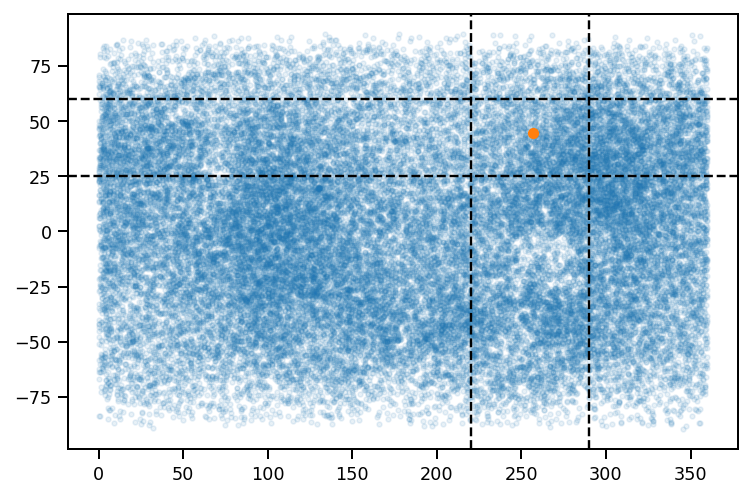

In [29]:
plt.scatter(df_comparison['ra'], df_comparison['dec'], marker='.', alpha=0.1)
plt.scatter(df_targ_TESS['ra'], df_targ_TESS['dec'], marker='o')
plt.axvline(220, color='k', linestyle='dashed')
plt.axvline(290, color='k', linestyle='dashed')
plt.axhline(25, color='k', linestyle='dashed')
plt.axhline(60, color='k', linestyle='dashed')

In [30]:
mask = ((df_comparison['ra'] > 220) & 
        (df_comparison['ra'] < 290) & 
        (df_comparison['dec'] > 25) & 
        (df_comparison['dec'] < 60) )

In [31]:
df_comparison = df_comparison[mask].reset_index(drop=True)

In [32]:
len(df_comparison)

1774

Now let's look for TESS lightcurves for these!

In [33]:
import lightkurve as lk

In [34]:
n_sources = len(df_comparison)

In [35]:
df_comparison.head()

,ID,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,...,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID,bp_rp,D,G_absolute_mag
0,68074093,20190415,<NA>,3046-00526-1,651-054088,14425965+4006572,<NA>,J144259.59+400658.1,1487312711787225216,,...,220.748157,40.116180,0.025795,0.028725,1,0,152458955,0.590170,131.338211,3.064175
1,158539353,20190415,<NA>,3860-00366-1,722-053669,14455203+5418375,<NA>,J144552.03+541837.0,1606467783322323712,56249771,...,221.466810,54.310233,0.021539,0.026117,1,0,152636904,0.586640,242.134857,3.110214
2,68121729,20190415,<NA>,2560-00806-1,631-051175,14462594+3600138,<NA>,J144625.93+360013.7,1293918653801421568,49899857,...,221.608037,36.003801,0.016486,0.021758,1,0,152688607,0.663071,202.156204,3.659464
3,310003487,20190415,<NA>,3867-01403-1,741-052997,14502820+5806201,<NA>,J145028.13+580620.4,1613917872249237760,57367549,...,222.617110,58.105690,0.085172,0.078735,1,0,152932493,0.612440,227.464020,1.878687
4,158514451,20190415,71896,3863-00876-1,733-055241,14421941+5631197,<NA>,J144219.51+563119.4,1607721948132539136,57366179,...,220.581367,56.521892,0.022091,0.022801,1,0,152466504,0.655861,116.862160,3.755151


## Cross match with Gaia DR3 directly

So that we can get the `vbroad` parameter.

In [36]:
df_comparison['GAIA']

0       1487312711787225216
1       1606467783322323712
2       1293918653801421568
3       1613917872249237760
4       1607721948132539136
               ...         
1769    2040103113357673728
1770    2127793976027791360
1771    2038224013630580352
1772    2133182064038315136
1773    2127066301190038784
Name: GAIA, Length: 1774, dtype: object

In [37]:
df_comparison['TESS_Name'] = 'TIC ' + df_comparison['ID'].astype(str)

In [38]:
df_comparison['TESS_Name'].to_csv('../../data/gaia/comparison_query.csv', index=False, header=False)

### Randomly select a subsample

In [39]:
df_comparison['n_SPOC'] = 0

In [40]:
df_comparison['iqr_90_10'] = 0.0

In [41]:
df_comparison.loc[4, 'n_SPOC']

0

Pre-cache the files by downloading them now, they'll load much faster later.

In [42]:
i=0

In [ ]:
for i in trange(n_sources):
    source = 'TIC {}'.format(df_comparison.loc[i, 'ID'])
    sr = lk.search_lightcurve(source, author='SPOC')
    if len(sr)>0: 
        #lcs = sr.download_all()
        df_comparison.loc[i, 'n_SPOC'] = len(sr)
        lc = sr[0].download(quality_bitmask='hard').normalize()
        qloR, qhiR = np.percentile(lc.remove_outliers(sigma_lower=3).flux.value, (5, 95))
        df_comparison.loc[i, 'iqr_90_10'] = qhiR - qloR
        

  0%|          | 0/1774 [00:00<?, ?it/s]

No data found for target "TIC 158539353".
No data found for target "TIC 236289380".
No data found for target "TIC 67743250".
No data found for target "TIC 161027295".
No data found for target "TIC 67884516".
No data found for target "TIC 229898050".
No data found for target "TIC 68075088".
No data found for target "TIC 68074459".
No data found for target "TIC 368290920".
No data found for target "TIC 219826801".
No data found for target "TIC 161663630".
No data found for target "TIC 161002208".
No data found for target "TIC 229909127".
No data found for target "TIC 20240110".
No data found for target "TIC 20291909".
No data found for target "TIC 158020915".
No data found for target "TIC 9059854".
No data found for target "TIC 161003941".
No data found for target "TIC 28239116".
No data found for target "TIC 309808245".
No data found for target "TIC 219839265".
No data found for target "TIC 28262400".
No data found for target "TIC 161026764".
No data found for target "TIC 321576335".
No

No data found for target "TIC 161745928".
No data found for target "TIC 162493311".
No data found for target "TIC 17466774".
No data found for target "TIC 29413139".
No data found for target "TIC 310153465".
No data found for target "TIC 320333596".
No data found for target "TIC 284302020".
No data found for target "TIC 159878763".
No data found for target "TIC 236350733".
No data found for target "TIC 236352358".
No data found for target "TIC 159872880".
No data found for target "TIC 310152556".
No data found for target "TIC 188596686".
No data found for target "TIC 159982417".
No data found for target "TIC 236348922".
No data found for target "TIC 17539289".
No data found for target "TIC 219492841".
No data found for target "TIC 219493380".
No data found for target "TIC 159980591".
No data found for target "TIC 24106635".
No data found for target "TIC 159939678".
No data found for target "TIC 188596697".
No data found for target "TIC 161821828".
No data found for target "TIC 23349042

No data found for target "TIC 188625601".
No data found for target "TIC 72840332".
No data found for target "TIC 274969598".
No data found for target "TIC 236011725".
No data found for target "TIC 257646972".
No data found for target "TIC 257730511".
No data found for target "TIC 257730766".
No data found for target "TIC 21961273".
No data found for target "TIC 57392936".
No data found for target "TIC 298414216".
No data found for target "TIC 458551647".
No data found for target "TIC 115413622".
No data found for target "TIC 258240984".
No data found for target "TIC 21679649".
No data found for target "TIC 458579776".
No data found for target "TIC 257490586".
No data found for target "TIC 85513043".
No data found for target "TIC 405557455".
No data found for target "TIC 159349157".
No data found for target "TIC 82405779".
No data found for target "TIC 21633437".
No data found for target "TIC 188666000".
No data found for target "TIC 462619459".
No data found for target "TIC 159329279".

## Overview: Where does HAT-P-67 fall in terms of TESS amplitude of modulation?

In [ ]:
df_targ_TESS

In [ ]:
sr = lk.search_lightcurve('HAT-P-67', author='SPOC')
lc0 = sr[0].download(quality_bitmask='hard').normalize()

qlo, qhi = np.percentile(lc0.remove_outliers(sigma_lower=3).flux.value, (5, 95))

ax = lc0.plot()
lc0.remove_outliers(sigma_lower=3, sigma_upper=3).plot(ax=ax)
ax.axhline(qlo, color='r')
ax.axhline(qhi, color='r')
ax.set_ylim(0.98, 1.01)

In [ ]:
plt.hist(df_comparison['iqr_90_10'], bins=np.arange(0.001, 0.02, 0.0005));
plt.axvline(qhi-qlo, color='r')
plt.yscale('log')

In [ ]:
(df_comparison['iqr_90_10']>(qhi-qlo)).sum()/(df_comparison['iqr_90_10']>0).sum()

So HAT-P-67 has a TESS lightcurve that is more variable than about 89% of other sources of similar effective temperature.

In [ ]:
df_targ['G_absolute_mag']

In [ ]:
df_comparison = df_comparison[df_comparison.iqr_90_10 > 0]

In [ ]:
plt.scatter(df_comparison['Teff'], df_comparison['logg'], c=df_comparison['iqr_90_10'],
            vmin=0, vmax=0.02, marker='o', s=30)
#plt.scatter(2.12, qhi-qlo, marker='*', s=200, ec='k')

### Spot-checking lightcurves: Random search

In [ ]:
mask = df_comparison.iqr_90_10 > 0.0036

In [ ]:
mask.sum()

In [ ]:
df_subsample = df_comparison[mask].reset_index()

In [ ]:
i=0

In [ ]:
df_subsample['Prot'] = 0.0

In [ ]:
for i in range(len(df_subsample)):
    source = 'TIC {}'.format(df_subsample.loc[i, 'ID'])
    sr = lk.search_lightcurve(source, author='SPOC')
    if len(sr)>0:
        lc = sr[0].download(quality_bitmask='hard').normalize()
        qloR, qhiR = np.percentile(lc.remove_outliers(sigma_lower=3).flux.value, (5, 95))

        pg = lc.to_periodogram(minimum_period=0.5*u.day, maximum_period=15*u.day, oversample_factor=10)
        prot = pg.period_at_max_power.to(u.day).value
        #ax2 = pg.plot()
        #ax2.axvline(prot)
        df_subsample.loc[i, 'Prot'] = prot

        #ax = lc.plot()
        #lc.remove_outliers(sigma_lower=3, sigma_upper=3).plot(ax=ax)
        #ax.axhline(qloR, color='g')
        #ax.axhline(qhiR, color='g')

        #ax.axhline(qlo, color='r')
        #ax.axhline(qhi, color='r')
        #ax.set_ylim(0.98, 1.01)
    else:
        print('na')

In [ ]:
df_subsample_GDR3 = Table.read('../../data/gaia/comparison_sample_GDR3.vot').to_pandas()

df_subsample['GAIA'] = df_subsample['GAIA'].astype(int)
df_merge = pd.merge(df_subsample, df_subsample_GDR3, left_on='GAIA', right_on='source_id')

In [ ]:
hat_p_67_vbroad = Table.read('../../data/gaia/1668443694513O-result.vot').to_pandas()['vbroad'][0]

In [ ]:
plt.hist(df_subsample_GDR3.vbroad, bins=np.arange(0, 100, 5));
plt.hist(df_merge.vbroad, bins=np.arange(0, 100, 5));
plt.axvline(hat_p_67_vbroad, color='r');
plt.yscale('log')

In [ ]:
plt.hist(df_subsample.Prot, bins=np.arange(0, 15, 0.9));
plt.axvline(4.8, color='r');

Neat!

In [ ]:
plt.plot(df_merge.Prot, df_merge.vbroad, '.')
plt.plot(5, hat_p_67_vbroad, '*', ms=10)
plt.ylim(0, 120)

Neat! Let's add on the Leiner et al. 2022 comparison sample!

In [ ]:
df_Leiner_GDR3 = Table.read('../../data/gaia/Leiner_DR3_2000.vot').to_pandas()

In [ ]:
df_Leiner = pd.merge(df, df_Leiner_GDR3, left_on='ID', right_on='source_id')

In [ ]:
df_Leiner